In [1]:
from Nb_utils import *

NOTE! Installing ujson may make loading annotations faster.


/home/superorange5/.local/lib/python3.8/site-packages/torchvision/transforms/transforms.py:803: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


# 1. select dataset

## 1a. CK2B

### load data

In [21]:
# parameter setting
ratio=1.2
dataset_name = 'VOC2007_bddval1'
output_csv_file = 'eval_metric_ck2b.csv'
source_list =['kitti','cityscape']

# config
cfg = setup("configs/pt/final_c2b.yaml")

# load test data
test_data_loader = build_detection_test_loader(cfg, dataset_name)

# load annotations
data_annotation = DatasetCatalog.get(dataset_name)

# load model
model_c2b = get_model('c2b', 11999)
model_k2b = get_model('k2b', 'final')
model_list=[model_c2b,model_k2b]


keep_experiments/c2b/cfg.yaml
keep_experiments/c2b/model_0011999.pth
-------- pretrained model loaded ---------
-------- pretrained model loaded ---------
keep_experiments/k2b/cfg.yaml
keep_experiments/k2b/model_final.pth
-------- pretrained model loaded ---------
-------- pretrained model loaded ---------


## 1b. SKF2c

In [15]:
# parameter setting
dataset_name = 'VOC2007_cityval1'
source_list =['sim10k','kitti','foggycityscape']
output_csv_file = 'eval_metric_skf2c.csv'
ratio = 1.706
# config
cfg = setup("configs/pt/final_k2c.yaml")

test_data_loader = build_detection_test_loader(cfg, dataset_name)


#---------skf2c-------
model_s2c = get_model('s2c', 15999)
model_k2c = get_model('k2c', 19999)
model_f2c = get_model('f2c', 'final') #8class
model_list=[model_s2c,model_k2c,model_f2c]

data_loader_iter = iter(test_data_loader)
test_data = data_loader_iter.next()
data_annotation = DatasetCatalog.get(dataset_name)


keep_experiments/s2c/cfg.yaml
keep_experiments/s2c/model_0015999.pth
-------- pretrained model loaded ---------
-------- pretrained model loaded ---------
keep_experiments/k2c/cfg.yaml
keep_experiments/k2c/model_0019999.pth
-------- pretrained model loaded ---------
-------- pretrained model loaded ---------
keep_experiments/f2c/cfg.yaml
keep_experiments/f2c/model_final.pth
-------- pretrained model loaded ---------
-------- pretrained model loaded ---------


# 2. Get results

## 2A.single image test

In [16]:
data_loader_iter = iter(test_data_loader)
test_data = data_loader_iter.next()

proposals_roih_multiple=[]
for model in model_list:
    proposals_roih_multiple.append(get_proposal_roih(test_data,model))

    #data_annotation[0]['annotations'][0]['bbox']
ma_gt, ma_src = get_match_array_all(proposals_roih_multiple, data_annotation[0]['annotations'],ratio)



### get TP FP

In [17]:
TP, TN_array  =get_TP(ma_gt,source_list)
#TP, TN1, TN2
FP_array = get_FP(ma_src,source_list)
# src1 FP1 FP2, src2 FP1 FP2

In [18]:
TP

18

In [19]:
TN_array

[0, 0, 0]

In [20]:
FP_array

[[5, 13, 1], [1, 0, 1], [3, 5, 6]]

## 2.B output results of all images

### save to eval_metricxxx.csv

In [24]:
eval_metric_summary(test_data_loader, data_annotation,model_list, source_list,
                    output_file = output_csv_file,ratio=ratio)

# 3. draw pie chart

### a.ck2b

In [30]:
input_file = 'eval_metric_ck2b.csv'
title = 'ck2b'

### b.skf2c

In [ ]:
input_file = 'eval_metric_skf2c.csv'
title = 'skf2c'

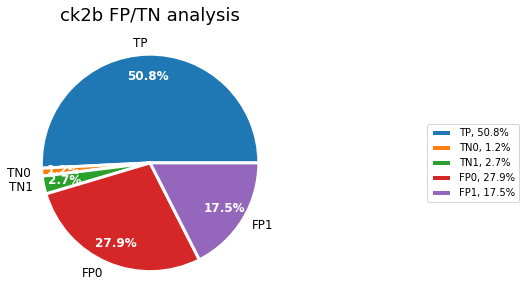

In [31]:

eval_skf2c = pd.read_csv(input_file)
labels = eval_skf2c.columns[1:]

pie_chart_list = gen_pie_chart_list(eval_skf2c)
draw_pie_chart(pie_chart_list, labels,title)

# Appendix. show match array 

### a. gt

In [10]:
df_gt = pd.DataFrame()

ma_gt_array = np.array(ma_gt).T
df_gt = pd.DataFrame(ma_gt_array, columns = source_list)
df_gt

,sim20k,kitti,foggycityscape
0,True,True,False
1,True,True,True
2,True,True,True
3,True,True,True
4,True,True,True
5,True,True,True
6,True,True,True
7,True,True,True
8,True,True,True
9,False,False,False


### b. source

In [6]:
#ma_src

df_src = pd.DataFrame()

ma_src_array = np.array(ma_src[2]).T
df_src = pd.DataFrame(ma_src_array, columns = source_list)
df_src.to_csv("src_foggy2city_match_array.csv")

In [45]:
TP

7

In [46]:
TN_array

[11, 1, 0]

In [47]:
FP_array

[[5, 13, 22], [1, 0, 24], [3, 5, 30]]